In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import os
#rcParams.update(params)

from Astro import Astro_multi_compartment
from Astro_morphology import Astrocyte_morphology
from helper_plots import *
from Parameters import p
import Stimulus
from Stimulus_gen import Stimulus_gen

In [2]:
p['ratio'] = 0.15 * np.exp(-0.002*(1**2.32))

#### 1. Constant glutamate stimulus

In [3]:
p['time'] = 100
p['tstart'] = 45
p['tstop'] = 55

In [4]:
morpho = Astrocyte_morphology(subcell_comp = 'process')
morpho.compartment_morphology()
N = morpho.N
length = morpho.length

In [5]:
glut_conc = 0.1
stim_const = Stimulus_gen(N, p['time'], p['dt'], 
                          p['tstart'], p['tstop'], 
                          p['input_length'], length, glut_conc)
stim_const.generate_stimulus()

Text(0,0.5,u'Glutamate [mM]')

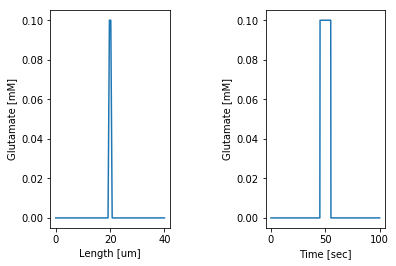

In [43]:
plt.subplots_adjust(wspace = 0.8)
plt.subplot(121)
plt.plot(np.linspace(0,length,N)*1e6, stim_const.glut_stimulus[:,500])
plt.xlabel('Length [um]')
plt.ylabel('Glutamate [mM]')
plt.subplot(122)
plt.plot(np.arange(0,p['time'], p['dt']), stim_const.glut_stimulus[40,:])
plt.xlabel('Time [sec]')
plt.ylabel('Glutamate [mM]')

In [7]:
# simulate system
astro_const = Astro_multi_compartment(params = p, model_type='NKV', 
                                      subcell_comp='process', 
                                      stimulus = stim_const.glut_stimulus)

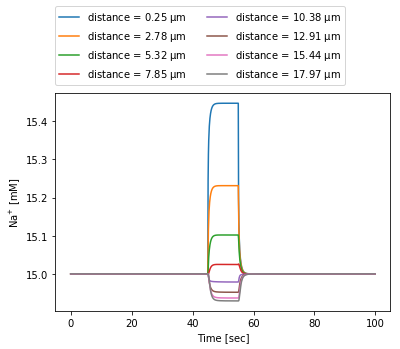

In [8]:
plot_time_series_single(astro_const.N, astro_const.time, 
                        astro_const.dt, astro_const.Na, 
                        astro_const.length, r'$\mathsf{Na^{+}\/\/[mM]}$')

#### 2. Glutamate pulses

In [50]:
p['time'] = 300
p['tstart'] = 120
p['tstop'] = 180
num_pulses = 3
stim_pulse = Stimulus_gen(N, p['time'], p['dt'], 
                          p['tstart'], p['tstop'], 
                          p['input_length'], length, glut_conc, 
                          'pulse', num_pulses)
stim_pulse.generate_stimulus()

Text(0,0.5,u'Glutamate [mM]')

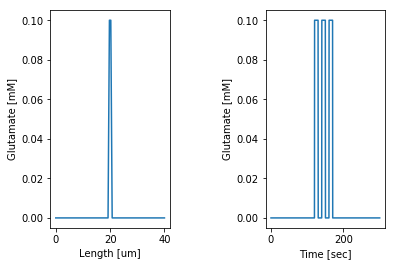

In [52]:
plt.subplots_adjust(wspace = 0.8)
plt.subplot(121)
plt.plot(np.linspace(0,length,N)*1e6, stim_pulse.glut_stimulus[:,1200])
plt.xlabel('Length [um]')
plt.ylabel('Glutamate [mM]')
plt.subplot(122)
plt.plot(np.arange(0,p['time'],p['dt']), stim_pulse.glut_stimulus[40,:])
plt.xlabel('Time [sec]')
plt.ylabel('Glutamate [mM]')

In [26]:
# simulate system
astro_pulse = Astro_multi_compartment(params = p, model_type='NKV', 
                                      subcell_comp='process', 
                                      stimulus = stim_pulse.glut_stimulus)

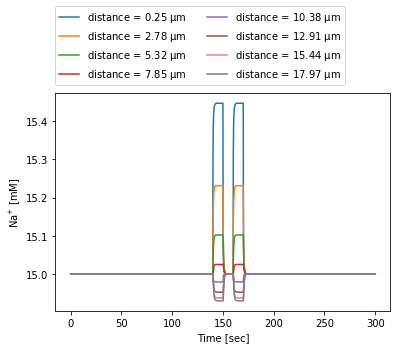

In [27]:
plot_time_series_single(astro_pulse.N, astro_pulse.time, 
                        astro_pulse.dt, astro_pulse.Na, 
                        astro_pulse.length, r'$\mathsf{Na^{+}\/\/[mM]}$')

#### 3. Constant glutamate stimulus plus noise

In [53]:
p['time'] = 100
p['tstart'] = 45
p['tstop'] = 55
glut_conc = 0.1
stim_noise = Stimulus_gen(N, p['time'], p['dt'], 
                    p['tstart'], p['tstop'], 
                    p['input_length'], length, glut_conc, 
                    'constant_plus_noise')
stim_noise.generate_stimulus()

Text(0,0.5,u'Glutamate [mM]')

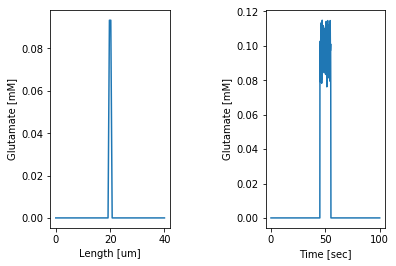

In [54]:
plt.subplots_adjust(wspace = 0.8)
plt.subplot(121)
plt.plot(np.linspace(0,length,N)*1e6, stim_noise.glut_stimulus[:,500])
plt.xlabel('Length [um]')
plt.ylabel('Glutamate [mM]')
plt.subplot(122)
plt.plot(np.arange(0,p['time'], p['dt']), stim_noise.glut_stimulus[40,:])
plt.xlabel('Time [sec]')
plt.ylabel('Glutamate [mM]')

In [32]:
# simulate system
astro_noise = Astro_multi_compartment(params = p, model_type='NKV', 
                                      subcell_comp='process', 
                                      stimulus = stim_noise.glut_stimulus)

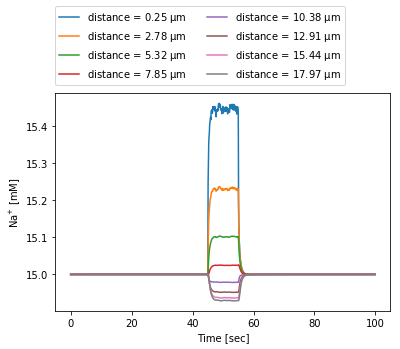

In [33]:
plot_time_series_single(astro_noise.N, astro_noise.time, astro_noise.dt, astro_noise.Na, astro_noise.length, r'$\mathsf{Na^{+}\/\/[mM]}$')